# 此文档用来生成加权的网格

## 搜索所有格子
对每个格子找距离为1的所有点，用作权重

In [1]:
include("./src/dataSplit.jl")
include("./src/MyPlot.jl")

Main.MyPlot

In [2]:
dataSplit.dataSplitTest()
MyPlot.MyPlotTest()

dataSplit used!MyPlot used!

In [3]:
df = dataSplit.getDF("./data_proj_414.csv");
title = names(df);

In [4]:
data = df;
data_X = data[:,2];
data_Y = data[:,3];
data_Potter = data[:,4];
data_Weasley = data[:,5];
data_Granger = data[:,6];
data_Trip = data[:,7];
data_Close = data[:,8];
data_Far = data[:,9];

In [5]:
rows, columns = size(df)

(24094, 9)

In [6]:
function distance(x1,y1,x2,y2)
    return sqrt((x1-x2)^2+(y1-y2)^2)
end

distance (generic function with 1 method)

In [10]:
map_close = [-1 for i in 1:107, j in 1:107] 
map_far   = [-1 for i in 1:107, j in 1:107] 
for i = 1:107
    for j = 1:107
        p_x = i - 0.5
        p_y = j - 0.5
        for k in 1:24094
            x = data_X[k]
            y = data_Y[k]
            close = data_Close[k]
            far = data_Far[k]
            if distance(p_x,p_y,x,y) <= 1
                if map_close[i, j] == -1
                    map_close[i, j] = 0
                end
                map_close[i, j]+=close
                
            end
            if distance(p_x,p_y,x,y) <= 3
                if map_far[i, j] == -1
                    map_far[i, j] = 0
                end
                map_far[i, j]+=far
                
            end
        end
    end
end
                

## 存储数据到表格

In [11]:
using DataFrames, CSV
function save_array(file_name, map_close)
    df_close = DataFrame(map_close)
    CSV.write(file_name, df_close, delim="\t")
end
    

save_array (generic function with 1 method)

In [12]:
save_array("./close_map2.csv", map_close)
save_array("./far_map2.csv", map_far)

"./far_map2.csv"

## 表格查看

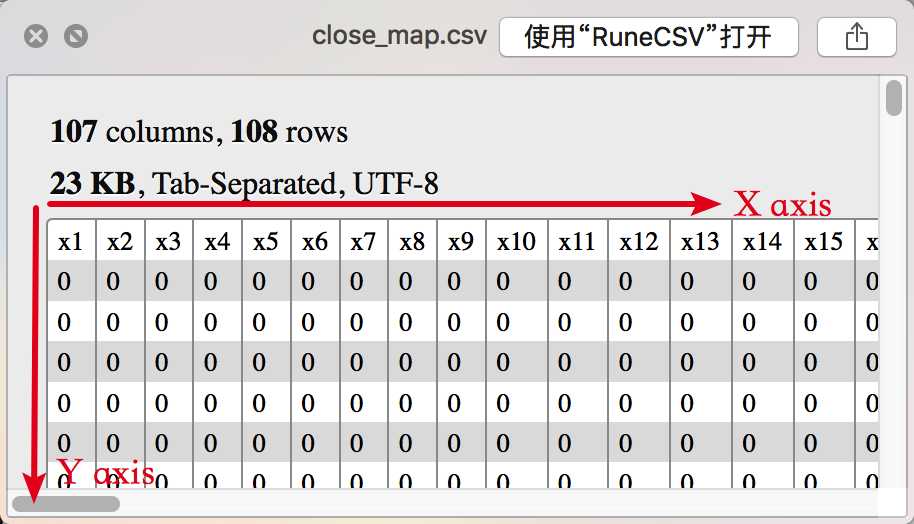

表格形式：横轴为X轴，纵轴为Y轴，

`close_map.csv` 存储了近的果子的信息，

`far_map.csv`   存储3米可见果子的信息。